In [28]:
import matplotlib.pyplot as plt
import scipy.fft as sp
import numpy as np
import math

# Подготовка сигнала

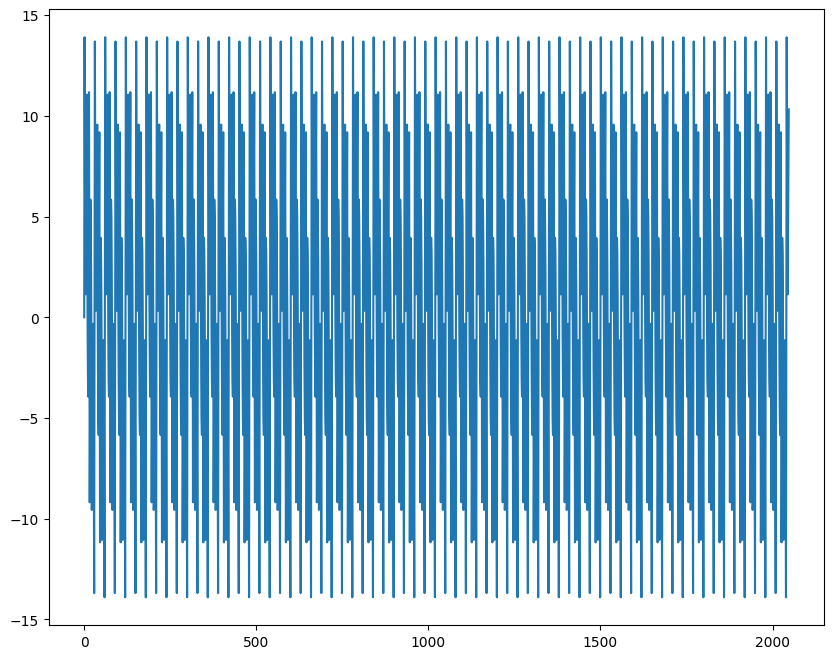

In [29]:
N = 2048
filter = 10000
Ax = [1,5,3,7,3,2,1]
fx = [0.5,1,2,5,7,9,12]

samples = range(0,N)


k = 7
pi = math.pi

fx = [i*10**3 for i in fx]

if max(fx) > 30*10**3:
    fd = 110*(10**3)
else:
    fd = 30*(10**3)
Td = 1/fd

t = []
x = []

for n in samples:
    t.append(n * Td)
    x.append(0)
    for i in range(0,k):
        x[n] += Ax[i] * math.sin(2*pi*fx[i]*t[n])

plt.figure(figsize=(10,8))
plt.plot(samples,x)

# Компоненты 

In [30]:
h = [0 for i in range(0,16)]

h[0] =  8.58398885E-3
h[15] = h[0]

h[1] = 1.01415502E-2
h[14] = h[1]

h[2] = -1.18238033E-2
h[13] = h[2]

h[3] = -4.97749198E-2
h[12] = h[3]

h[4] = -5.10048196E-2
h[11] = h[4]

h[5] = 3.87851131E-2
h[10] = h[5]

h[6] = 2.01367094E-1
h[9] = h[6]

h[7] = 3.33522835E-1
h[8] = h[7]

# Расчёты

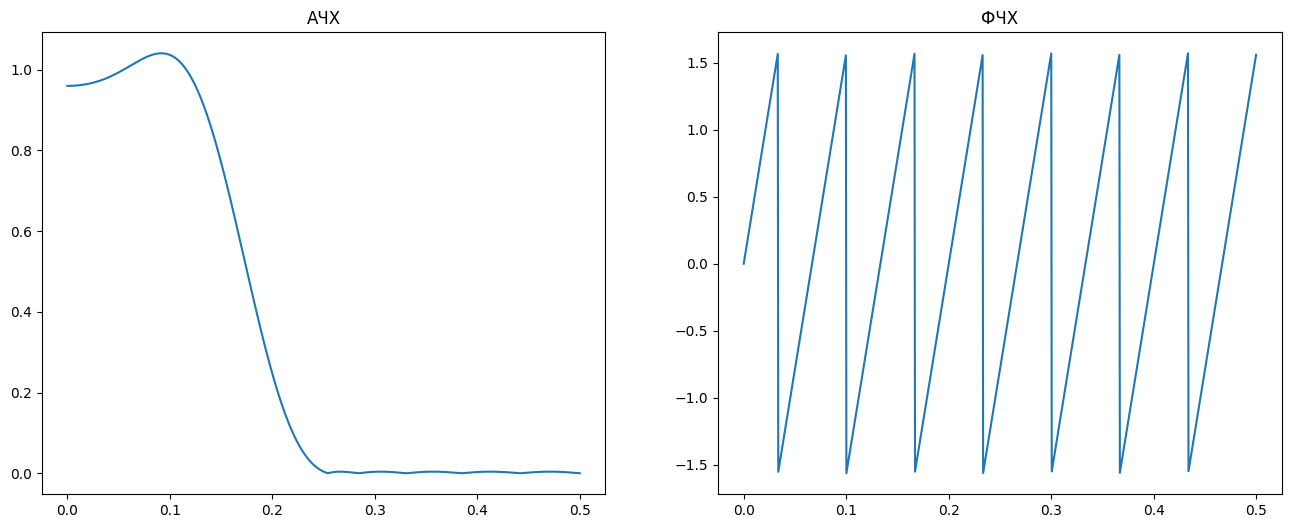

In [31]:
def A(x):
    b = h
    first = 0
    for j in range(0,len(b)):
        first += b[j] * math.cos(2*pi*x*j)
    first = first**2

    second = 0
    for j in range(0,len(b)):
        second += b[j] * math.sin(2*pi*x*j)
    second = second**2

    return(math.sqrt(first+second))

def fi(x):
    b = h
    first = 0
    for j in range(0,len(b)):
        first += b[j] * math.cos(2*pi*x*j)

    second = 0
    for j in range(0,len(b)):
        second += b[j] * math.sin(2*pi*x*j)

    return(math.atan(second/first))

fns = np.linspace(0,1,N)

As = [A(i) for i in fns]
fi = [fi(i) for i in fns]

fig, axs = plt.subplots(ncols=2,nrows=1,figsize=(16, 6))

axs[0].set_title("АЧХ")
axs[0].plot(fns[:N//2],As[:N//2])

axs[1].set_title("ФЧХ")
axs[1].plot(fns[:N//2],fi[:N//2])

# Графики по абсолютным частотам

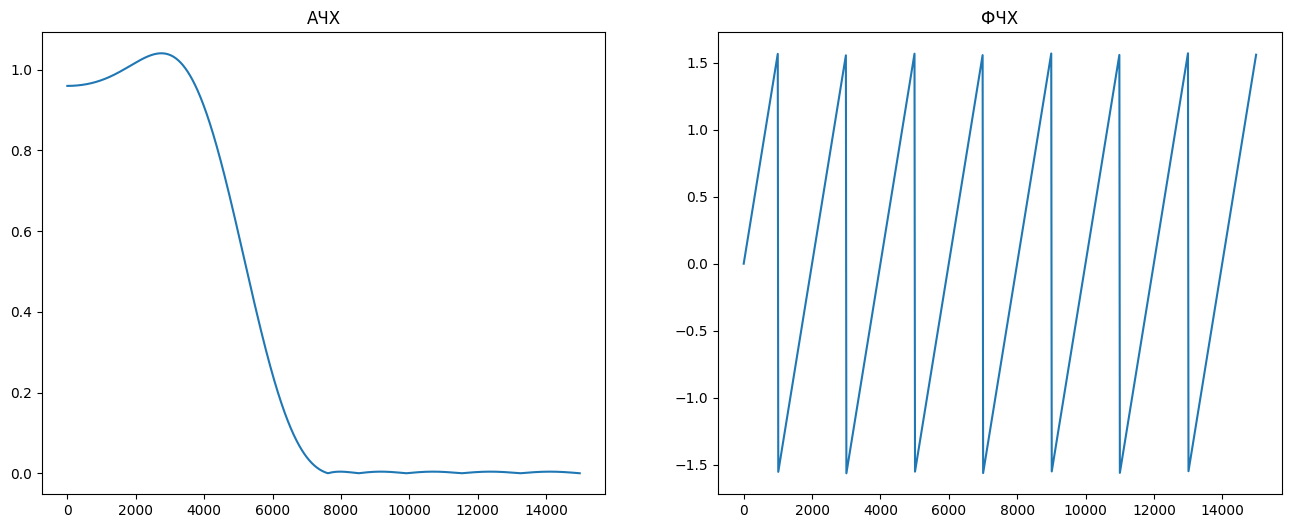

In [32]:
fn_abs = np.fft.fftfreq(N, 1/fd)

fig, axs = plt.subplots(ncols=2,nrows=1,figsize=(16, 6))

axs[0].set_title("АЧХ")
axs[0].plot(fn_abs[:N//2],As[:N//2])

axs[1].set_title("ФЧХ")
axs[1].plot(fn_abs[:N//2],fi[:N//2])

Тип фильтра "Фильтр высоких частот"

# Определение полос пропускания и среза

In [33]:
drop = 1/math.sqrt(2)
print(drop)

drops = []
drabs = []

for i in range(0,len(fns)//2):
    if As[i] <= drop:
        drops.append(As[i])
        drabs.append(fn_abs[i])

print(drops)
print(len(drops))
print(drabs[0])

0.7071067811865475
[0.7067982159983857, 0.7017466277912832, 0.6966722631130629, 0.6915757710312475, 0.6864578066297933, 0.681319030819277, 0.6761601101448488, 0.6709817165920142, 0.6657845273903308, 0.6605692248150996, 0.655336495987113, 0.6500870326705578, 0.6448215310691354, 0.6395406916204949, 0.6342452187890452, 0.6289358208572429, 0.6236132097154214, 0.6182781006502635, 0.6129312121319854, 0.607573265600322, 0.6022049852494002, 0.5968270978115873, 0.5914403323403861, 0.586045419992485, 0.5806430938090316, 0.5752340884962214, 0.5698191402052956, 0.5643989863120239, 0.5589743651957696, 0.5535460160182196, 0.548114678501868, 0.5426810927083391, 0.5372459988166469, 0.5318101369014651, 0.5263742467115046, 0.5209390674480877, 0.5155053375440007, 0.5100737944427137, 0.5046451743780619, 0.4992202121544644, 0.49379964092777645, 0.48838419198686034, 0.4829745945359543, 0.47757157547793383, 0.4721758591985491, 0.46678816735171724, 0.46140921864596185, 0.4560397286320786, 0.4506804094921142, 

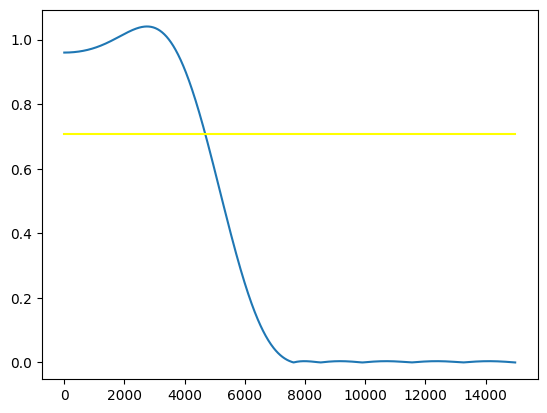

In [34]:
plt.plot(fn_abs[:N//2],As[:N//2])
s = [drop for i in fn_abs[:N//2]]
plt.plot(fn_abs[:N//2],s,color = "yellow")



# Свертка изначального сигнала

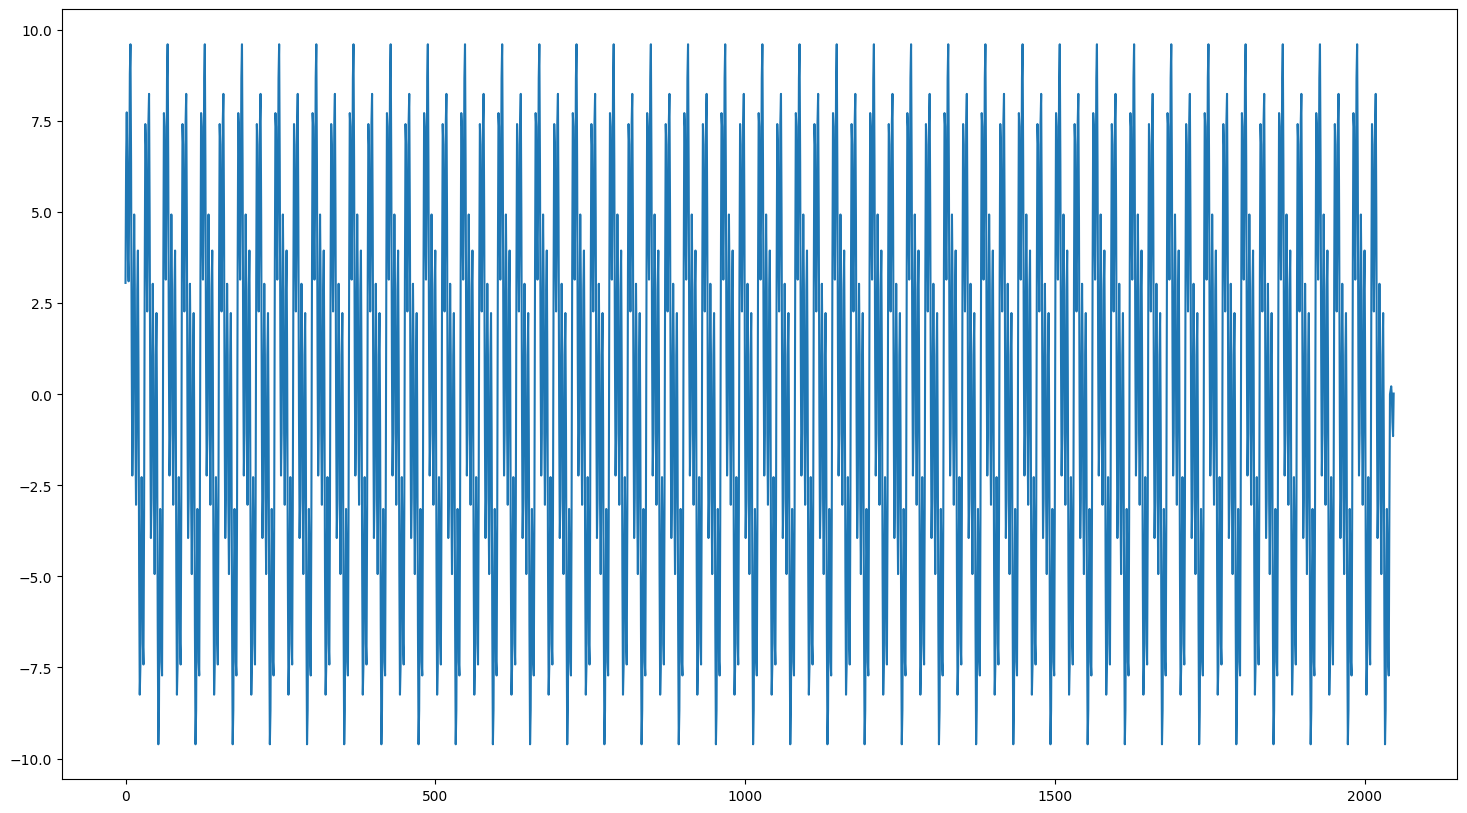

In [35]:
def yn(n):
    res = 0
    for i in range(0,len(h)):
        if n-i < 0:
            res += 0
        else:
            res += h[i]*x[n-i]

    return(res)

ys = [yn(i) for i in samples]

temp =  ys[7:] + ys[0:7]

ys = temp

plt.figure(figsize=(18,10))
plt.plot(samples,ys)

nf = fx
nA = Ax

Фильтр отбрасывает частоты выше : 4687.5


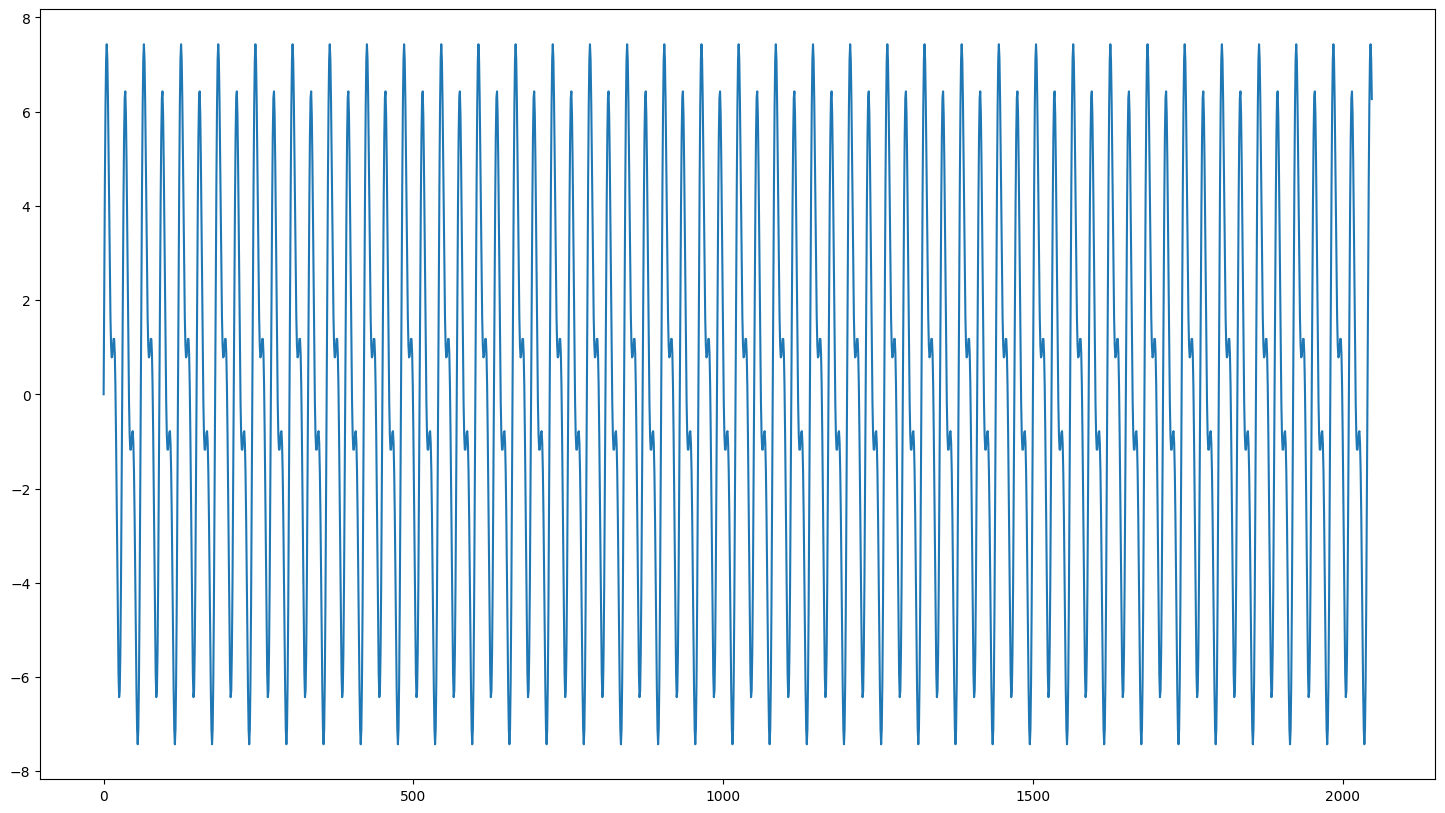

In [36]:
print("Фильтр отбрасывает частоты выше : " + str(drabs[0]))

filter = drabs[0] // 10**3

for i in range(0,len(nf)):
    if nf[i] >= filter*10**3:
        nf[i] = 0
        nA[i] = 0

xf = []

# Эталонный сигнал
for n in samples:
    xf.append(0)
    for i in range(0,k):
        xf[n] += nA[i] * math.sin(2*pi*nf[i]*t[n])

plt.figure(figsize=(18,10))
plt.plot(samples,xf)

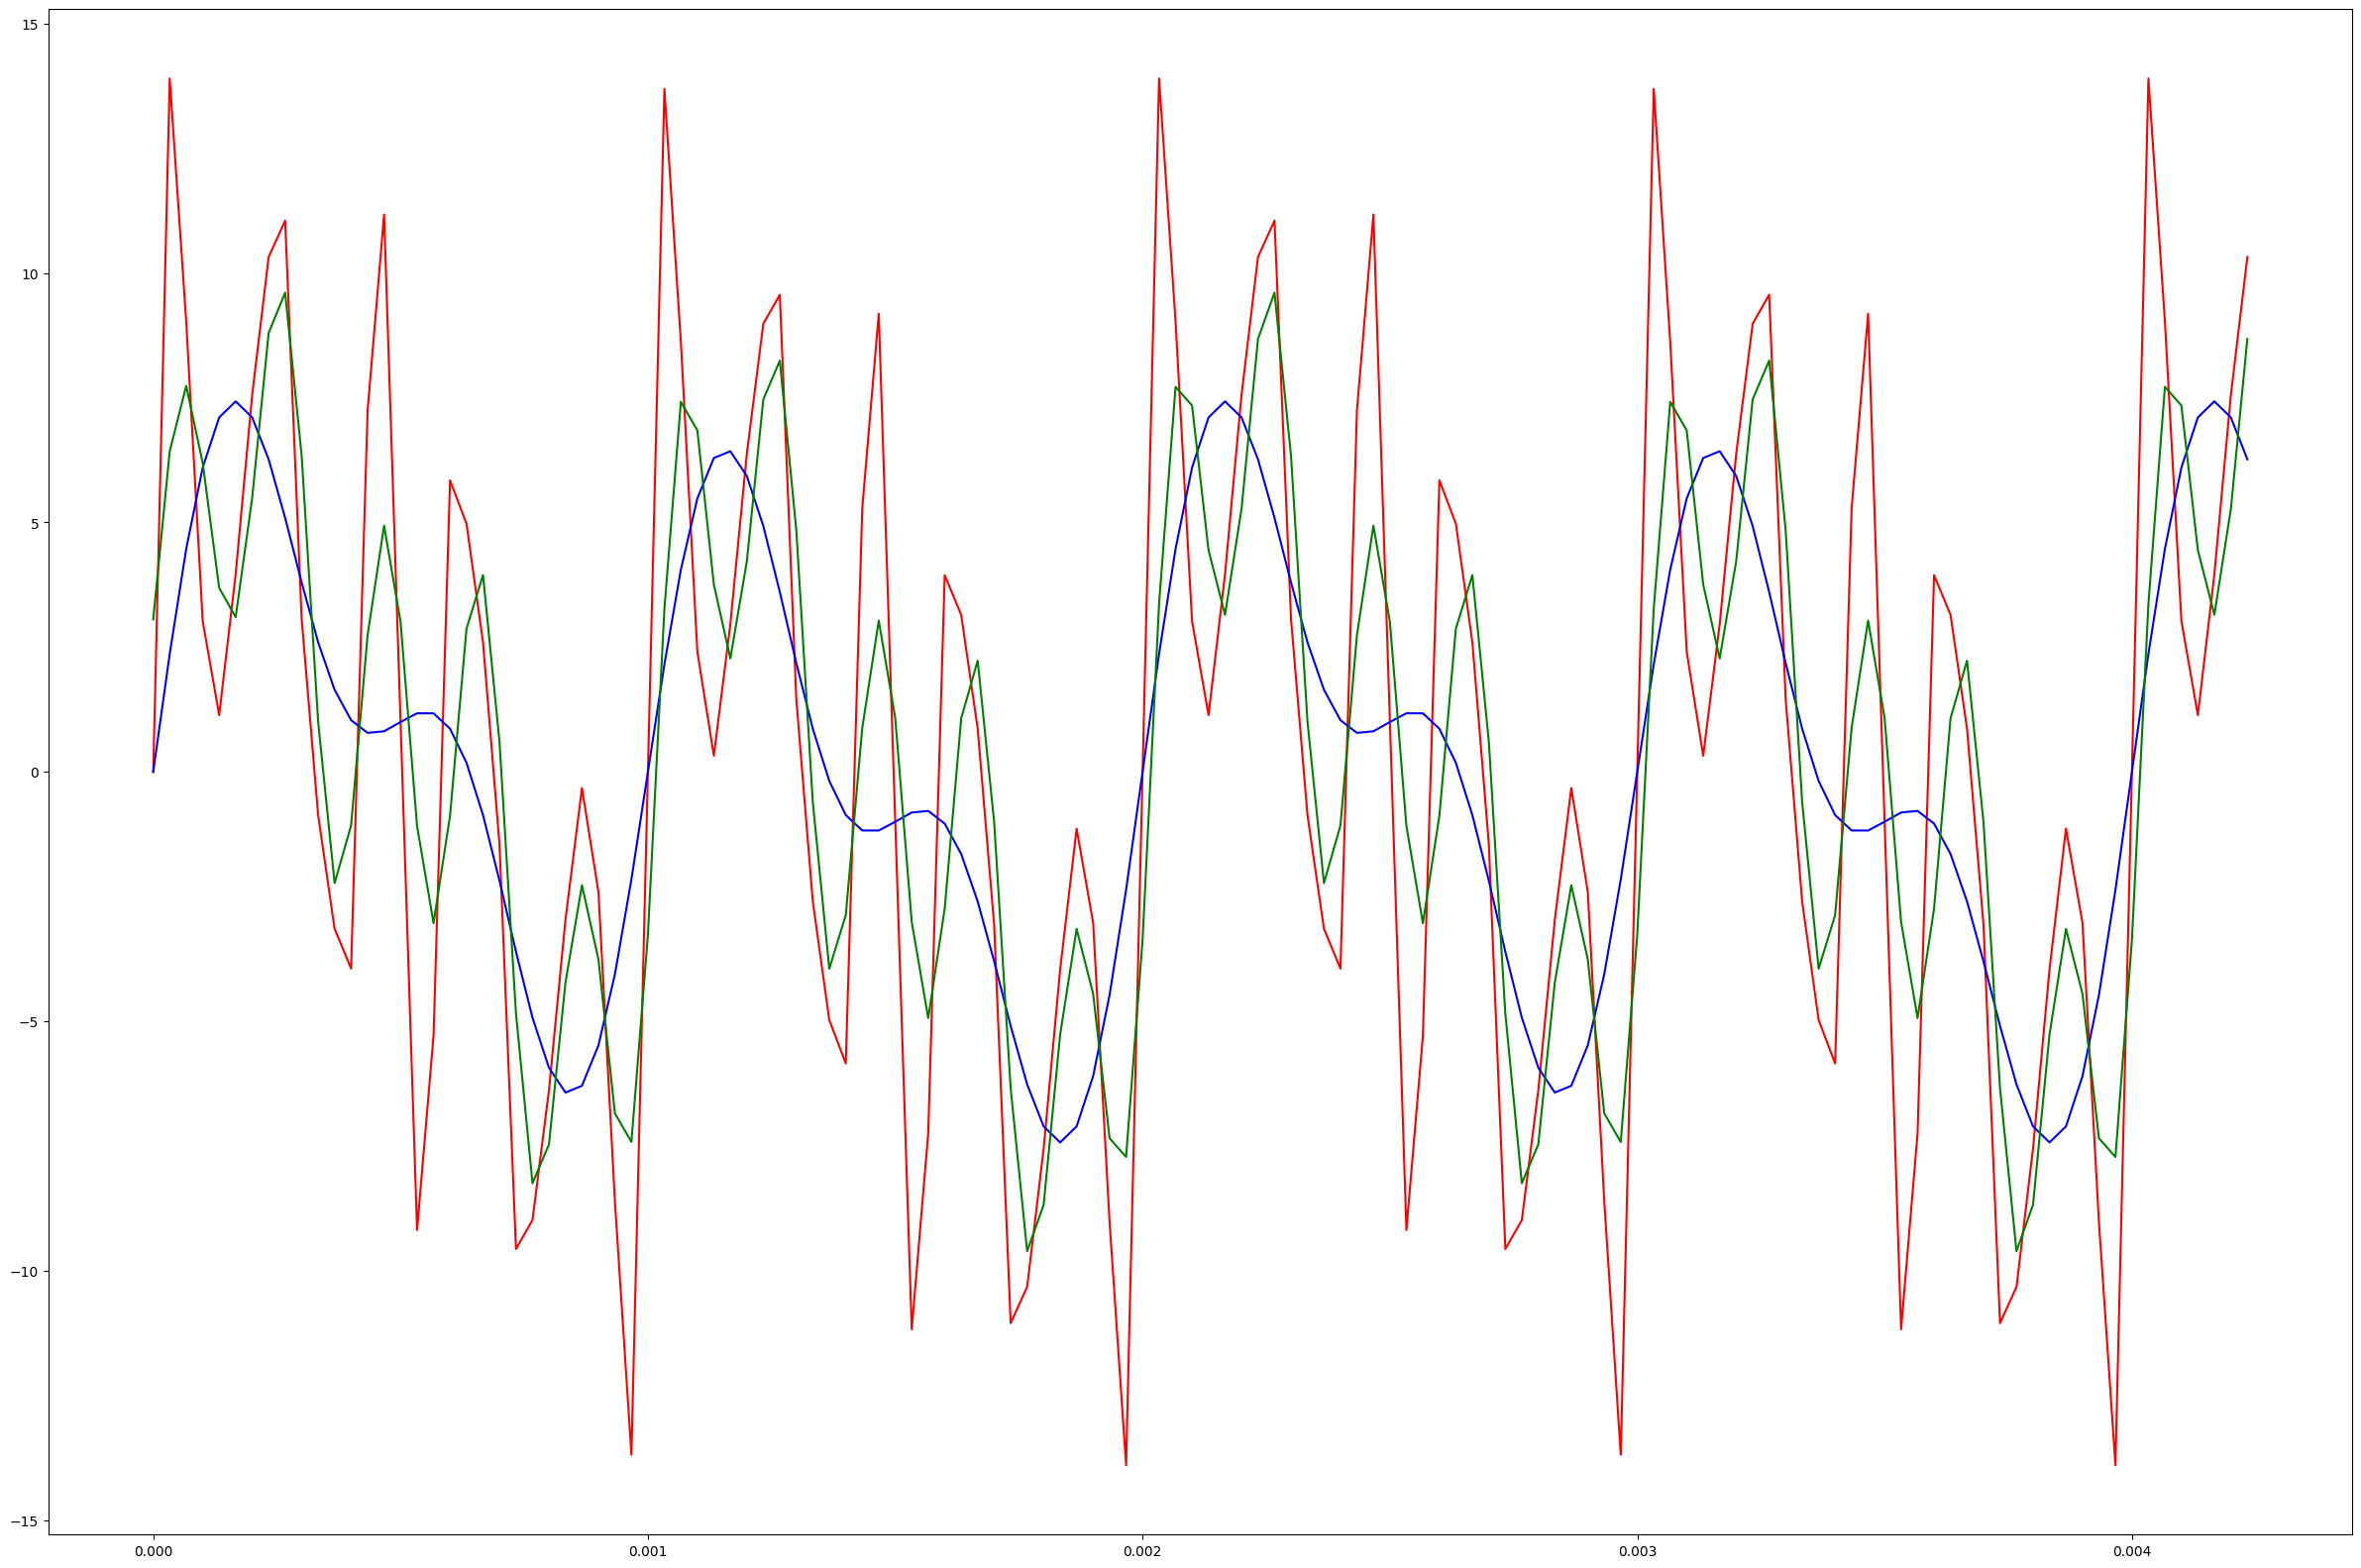

In [38]:
plt.figure(figsize=(30,20))

plt.plot(t[:128],x[:128],"red")
plt.plot(t[:128],xf[:128],"blue")
plt.plot(t[:128],ys[:128],"green")

# plt.plot(t,xf,"blue") # Эталоный
# plt.plot(t,ys,"green") # Свертка
# plt.plot(t,x,"red",linestyle = "--") # Изначальный